In [82]:
#loading the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import helperfunction as h
from matplotlib import gridspec

In [83]:
#creating a simple 2 layer binary o/p NN
#linear-->relu-->sigmoid

In [84]:
#importing the data and preprocessing it
#Preprocessing data -- loading data
digits = datasets.load_digits()
X_data = digits.data
Y_data = digits.target

#Preprocessing data -- Split the data into train and test
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.1,random_state=42)
for train_index,test_index in split.split(X_data,Y_data):
    X_train = X_data[train_index].T
    X_test = X_data[test_index].T
    Y_train = Y_data[train_index].T.reshape((-1,1))#reshaping to a vector
    Y_test = Y_data[test_index].T.reshape((-1,1))

#Preprocessing data -- Hotonecoding the Y to be able to use softmax function loss
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
Y_train = lb.fit_transform(Y_train).T
Y_test = lb.fit_transform(Y_test).T

In [85]:
#creating the layers , L1-->3 and L2-->1 node and initializations
np.random.seed(42)
W1 = np.random.randn(20,64)*0.1
b1 = np.zeros((20,1))

W2 = np.random.randn(10,20)*0.1
b2 = np.zeros((10,1))





In [86]:
#loss and cost function
m = X_train.shape[1]
learning_rate = 0.001
iterations_min = 100
iterations_max = 10000
lamb = 0.1
accuracys = []
    
costs = []
for i in range(iterations_min,iterations_max,20):
#calculating the linear functions:
    Z1 = h.linear_fn (W1,X_train,b1)
    A1 = h.relu(Z1)

    Z2 = h.linear_fn(W2,A1,b2)
    A2 = h.softmax_fn(Z2)
    loss = Y_train*np.log(A2) + (1-Y_train)*np.log(1-A2)
    cost = -(1.0/m)*np.sum(loss,keepdims=True)

# #backpass
    dz2 = (1.0/m)*(A2-Y_train)
    dW2 = (1.0/m)*np.dot(dz2,A1.T)
    db2 = (1.0/m)*np.sum(dz2,axis=1,keepdims=True).reshape(10,1)
    W2 = W2 -learning_rate*dW2
    b2 = b2 -learning_rate*db2

    da1 = np.dot(W2.T, dz2)
    dz1 = np.multiply(da1, np.int64(A1 > 0))
    dW1 = np.dot(dz1, X_train.T)
    db1 = np.sum(dz1, axis=1, keepdims = True).reshape(20,1)
    W1 = W1 -learning_rate*dW1
    b1 = b1 -learning_rate*db1
    costs.append(cost)
    #predictions
    #calculating the linear functions:
    Z1_pred = h.linear_fn (W1,X_test,b1)
    A1_pred = h.relu(Z1_pred)

    Z2_pred = h.linear_fn(W2,A1_pred,b2)
    A2_pred = h.softmax_fn(Z2_pred)

    #calculating accuracies
    pred_index=np.argmax(A2_pred,axis=0).reshape(-1,1)
    Y_test_index = np.argmax(Y_test,axis=0).reshape(-1,1)
    accuracy = sum(np.equal(pred_index,Y_test_index))/(A2_pred.shape[1]*1.0)
    accuracys.append(accuracy)
# costs
# accuracys


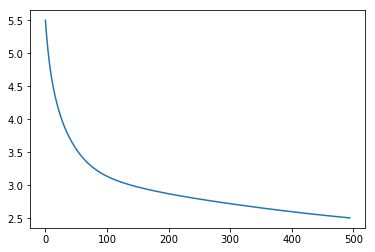

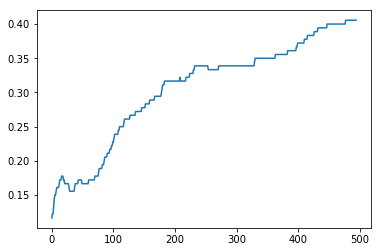

In [87]:

plt.plot(np.array(costs).reshape(-1,1))
plt.show()

plt.plot(np.array(accuracys).reshape(-1,1))
plt.show()

In [48]:
from PIL import Image
im = Image.open("/Users/vayuvegula/Desktop/five.jpg")

IOError: [Errno 2] No such file or directory: '/Users/vayuvegula/Desktop/zero.jpg'

In [47]:
from scipy.misc import imread, imsave
image_data = imread("/Users/vayuvegula/Desktop/five.jpg").astype(np.float32)
print 'Size: ', image_data.size
print 'Shape: ', image_data.shape
arr = np.array(image_data)

IOError: [Errno 2] No such file or directory: '/Users/vayuvegula/Desktop/zero.jpg'

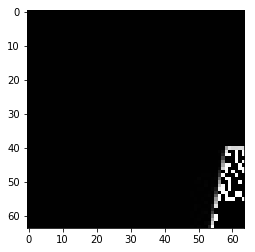

In [44]:
plt.imshow(arr[:64,:64], cmap=plt.cm.gray)
plt.show()

In [55]:
r = 100.0 / arr_zero.shape[1]
dim = (100, int(arr_zero.shape[0] * r))
dim

(100, 100)

In [57]:
azero_reshape = arr_zero.reshape(dim,3)

TypeError: 'tuple' object cannot be interpreted as an index

In [49]:
image_zero = imread("/Users/vayuvegula/Desktop/zero.jpg").astype(np.float32)

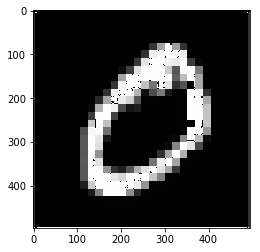

In [52]:
arr_zero = np.array(image_zero)
plt.imshow(arr_zero, cmap=plt.cm.gray)
plt.show()